# Computation of resonance frequencies

## Density profiles 

$\rho = 0.0000000000922584\cdot c^4 - 0.0000000294733\cdot c^3 + 0.00000419348 \cdot x^2 + 0.000322098\cdot x + 0.999075$

In [12]:

from matplotlib import rc
import matplotlib
#plt.switch_backend('agg')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams['text.latex.unicode']=True


d = [51.7, 51.7, 51.6, 51.1, 50.4, 49.1, 48.8, 45.0, 33.4, 25.3, 9.14, 1.2, 0.9, 0.6, 0.5, 0.5, 0.5]
densities29 = [52.0, 51.8, 51.9, 51.2, 50.9, 50.6, 50.2, 33.3, 13., 9., 0.7, 0.8, 0.7, 0.6, 0.5, 0.1, 0.1]
densities29_2 = [52.4, 52.7, 52.6, 52.2, 52.0, 51.6, 50.8, 37.1, 13., 2., 1., 0.8, 0.7, 0.6, 0.5, 0.4, 0.1]

def cond_dens(x):
    return x**4*0.0000000000922584+x**3*(-0.0000000294733)+x**2*0.00000419348+x*0.000322098+0.999075
d = np.array(d)
densities29 = np.array(densities29)
densities29_2 = np.array(densities29_2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


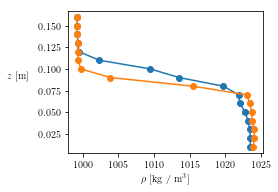

In [17]:
f = plt.figure()
h = np.arange(1., 17., 1.)/100.
plt.plot(cond_dens(d[:-1])*1000, h, 'o-')
plt.plot(cond_dens(densities29_2[:-1])*1000, h, 'o-')
plt.ylabel(u'$z$ [m]', rotation = 0, labelpad = 20)
plt.xlabel(r'$\rho$ [kg / m$^3$]')
ratio = 8./6.
f.set_size_inches(3.5, 3.5/ratio)
plt.savefig('dens_.pdf', bbox_inches='tight')


## 2 layers

$c = \sqrt{\frac{g'H_1H_2}{H}}$


$\frac{c}{2d} = f$

$\omega = \sqrt{\frac{g'H_1H_2}{H}} \frac{d}{4\pi}$

In [21]:
def twoLayerSpeed(rho1, rho2, h1, h2):
    h = h1 + h2
    drho = np.abs(rho2 - rho1)
    gPrime = drho * 9.81 / (rho2)
    return np.sqrt(gPrime*h1*h2/h)

In [22]:
h1 = 0.08
h2 = 0.08
rho1 = 1000*cond_dens(d)[6]
rho2 = 1000*cond_dens(d)[11]
freqTwolayer1 = twoLayerSpeed(rho1, rho2, h1, h2)/(2*0.255)
print("f_0 = ", freqTwolayer1, " Hz")

f_0 =  0.18392247244670676  Hz


In [23]:
print(rho1)
print(rho2)

1021.8779063565064
999.4675054726446


$\omega = ck = \sqrt{\frac{gk(\rho_2 - \rho_1)}{\rho_1 \coth (k H_1) + \rho_2 \coth (k H_2)}}$

$c = \sqrt{\frac{g(\rho_2 - \rho_1)}{\rho_1 k \coth (k H_1) + \rho_2 k \coth (k H_2)}}$

In [24]:
def twoLayerSpeedFull(rho1, rho2, h1, h2, k):
    numerator = 9.81*(np.abs(rho2-rho1))
    denom = rho1*k/np.tanh(k*h1) + rho2*k/np.tanh(k*h2)
    return np.sqrt(numerator/denom)


In [25]:
h1 = 0.08
h2 = 0.08
k = np.pi/0.255
rho1 = 1000*cond_dens(d)[6]
rho2 = 1000*cond_dens(d)[11]
freqTwolayer2 = twoLayerSpeedFull(rho1, rho2, h1, h2, k )/(2*0.255)
print("f_1 = ", freqTwolayer2, " Hz")

f_1 =  0.1601309198535943  Hz


In [26]:
def bouyantFrq(deriv, rho0):
    return np.sqrt(np.abs((9.81*deriv)/rho0))
h3 = 0.065
h1 = 0.065
h2 = 0.03
k = np.pi/(0.255) ## d = 25.5 cm

In [27]:
print(bouyantFrq(drho3, 1000.))

NameError: name 'drho3' is not defined

In [28]:
def lin(x, a, b):
    return a*x + b
from scipy.optimize import curve_fit
x = np.arange(0.07, 0.12, 0.01)
y = 1000*cond_dens(d)[6:11]
popt, pcov = curve_fit(lin, x, y)


In [29]:
drho3 =popt[0]

def K_i(x, N):
    return np.sqrt(np.array(N**2/x**2 - k**2))
T1 = k/np.tanh(h1*k)
T3 = k/np.tanh(h2*k)
def T_i(x, h, N):
    return K_i(x, N)/np.tan(K_i(x, N)*h)
def lhs(x):
    N2 = bouyantFrq(drho3, 1000.)
    return K_i(x, N2)**2 - T1*T_i(x, h2, N2) + T1*T3 -T3*T_i(x, h2, N2) 
from scipy import optimize
root = optimize.newton(lhs, 0.1)

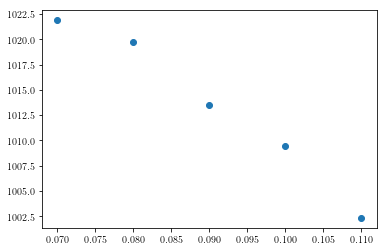

In [30]:
plt.plot(x, y, 'o')

In [31]:
from scipy import optimize
root = optimize.newton(lhs, 0.1)
res = root/(2*0.255)
print("f_3 = ", res, " Hz")

f_3 =  0.1455161079948468  Hz


Dispersion relations

In [32]:
threelayerspeeds = []
for k in ks:

    root = optimize.newton(lhs, 0.05)
    threelayerspeeds.append(root)
threelayerspeeds= np.array(threelayerspeeds)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


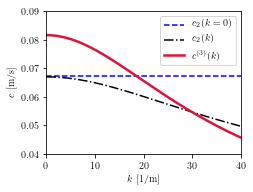

In [35]:
ks = np.arange(0., 44.0, 0.1)
f = plt.figure()
plt.plot([0, 40.], [twoLayerSpeed(rho1, rho2, h1, h2), twoLayerSpeed(rho1, rho2, h1, h2)], '--', c='blue', label='$c_2(k=0)$')

plt.plot(ks, twoLayerSpeedFull(rho1, rho2, h1, h2, ks), '-.', c='black', label='$c_2(k)$')
plt.plot(ks, threelayerspeeds, '-', c='Crimson', linewidth=2.5, label='$c^{(3)}(k)$')
#plt.plot([np.pi/0.255, np.pi/0.255], [0.04, 0.09], '--')
plt.legend(loc='upper right')
plt.ylim(0.04, 0.09)
plt.xlabel('$k$ [1$/$m]')
plt.ylabel('$c$ [m$/$s]')

plt.xlim(0., 40.)
f.set_size_inches(3.5, 3.5/ratio)
plt.savefig('disprel_.pdf', bbox_inches='tight')